In [6]:
import time

def timer_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        if kwargs.get('decrypt'):
            print(f"Время дешифрования {func.__name__}: {end_time - start_time} секунд")
        else:
            print(f"Время шифрования {func.__name__}: {end_time - start_time} секунд")
        return result
    return wrapper


In [7]:
def plot_histogram(text, title):
    counter = Counter(text)
    plt.rcParams['axes.unicode_minus'] = True
    plt.bar(counter.keys(), counter.values())
    plt.title(title)
    plt.show()


In [8]:
with open('document.txt', 'r') as file:
    text = file.read()
text = text.lower()
text = text.replace(' ', '').replace('\n', '')
text = text.replace('"', '').replace('\n', '')
key = "мікіта"
alphabet = "абвгдежзійклмнопрстуўфхцчшыьэюяё"

In [9]:
@timer_decorator
def Substitution(text, alphabet, k, decrypt=False):
    k = -k if decrypt else k

    new_text = [
        alphabet[(alphabet.index(char) + k) % len(alphabet)] if char in alphabet else char
        for char in text
    ]

    return ''.join(new_text)


encrypted_text = Substitution(text, alphabet, 21)
decrypted_text = Substitution(encrypted_text, alphabet, 21, decrypt=True)


plot_histogram(text, 'Исходный текст')
plot_histogram(encrypted_text, 'Зашифрованный текст')



Время шифрования Substitution: 0.0 секунд
Время дешифрования Substitution: 0.001007080078125 секунд


NameError: name 'Counter' is not defined

Время шифрования Trisemus: 0.0005037784576416016 секунд
Время дешифрования Trisemus: 0.0011043548583984375 секунд


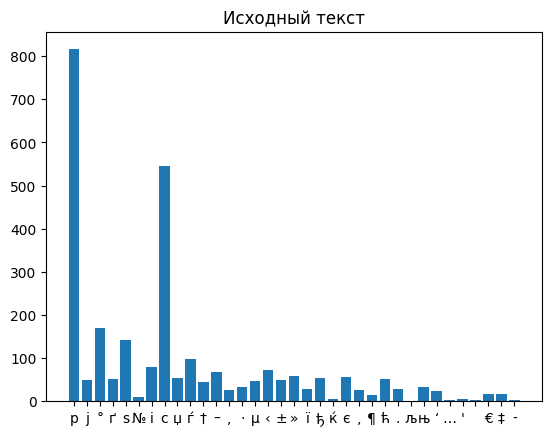

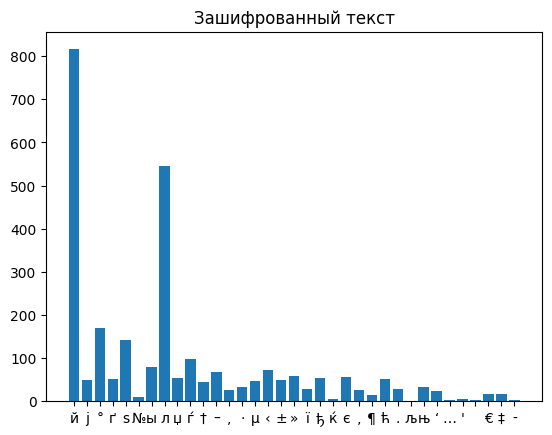

In [ ]:
@timer_decorator
def Trisemus(text, key, alphabet, decrypt=False):
    key = ''.join(sorted(set(key), key=key.index))
    grid = key + ''.join([char for char in alphabet if char not in key])
    new_text = [
        grid[new_index(char, grid, key, decrypt)] if char in grid else char
        for char in text
    ]
    return ''.join(new_text)

def new_index(char, grid, key, decrypt):
    index = grid.index(char)
    row = index // len(key)
    col = index % len(key)
    if decrypt:
        return (row - 1) * len(key) + col if row > 0 else (len(grid) // len(key) - 1) * len(key) + col
    else:
        return ((row + 1) % (len(grid) // len(key))) * len(key) + col
    

encrypted_text = Trisemus(text, key, alphabet, 21)
decrypted_text = Trisemus(encrypted_text, key, alphabet, decrypt=True)

plot_histogram(text, 'Исходный текст')
plot_histogram(encrypted_text, 'Зашифрованный текст')